<a href="https://colab.research.google.com/github/adanqz/tareas/blob/main/Regresion_Lineal_Participacion_Ciudadana_Votos_Predicci%C3%B3n_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

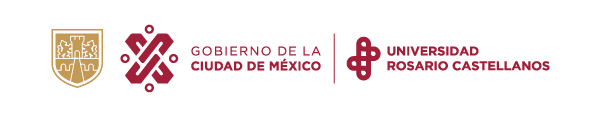

# Regresión lineal con Sklearn para proyectar una cífra de participación aproximada para las votaciones de 2024

Insertamos los datos históricos de los comicios pasados.
Fuente: http://siceef.ine.mx/campc.html?p%C3%A1gina=1

In [15]:
import pandas as pd

datos = {
    "año": [1994,2000,2006,2012,2015,2018],
    "participacion": [45729057,58782737,71374373,79492286,83536377,89134077]
}

df = pd.DataFrame(data=datos)
df

,año,participacion
0,1994,45729057
1,2000,58782737
2,2006,71374373
3,2012,79492286
4,2015,83536377
5,2018,89134077


Con ayuda del módulo `seaborn` ontenemos una pequeña descripción gráfica del Data Frame.

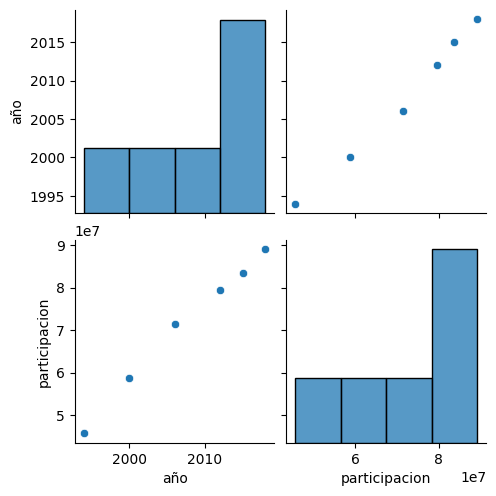

In [4]:
import seaborn as sns
sns.pairplot(df)

Vamos a realizar regresión lineal, de la siguiente manera:

*   Nuestra variable a predecir (variable dependiente) será la contenida en la columna _'fisica'_, denotada por la letra $Y$.

*   Nuestros predictores (variables independientes) serán el resto de las columanas del data frame, denotada por la letra $X$.


In [6]:
X = df.drop(labels='participacion', axis= 1)
Y = df['participacion']

Definimos un módelo de regresión lineal vacío.

In [7]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

Entrenamos el modelo

In [8]:
regr.fit(X,Y)

LinearRegression()

Hacemos las predicciones del módelo

In [9]:
pred = regr.predict(X)

Obtenemos los valores de los coefientes de la ecuación de regresion.

In [10]:
regr.coef_

array([1765781.44210526])

Obtenemos el coefiente independiente.

In [11]:
regr.intercept_

-3473464760.526316

Por lo tanto la ecuación de regresión es

In [12]:
print(f"f(x1) = x1*{regr.coef_[0]} + {regr.intercept_}")

f(x1) = x1*1765781.4421052632 + -3473464760.526316


Visualización de la recta de regresión

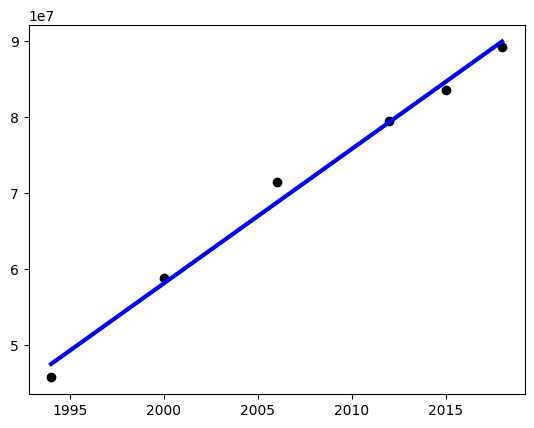

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X, Y, color="black")
plt.plot(X, pred, color="blue", linewidth=3)

Por último, revisamos las métricas para saber si el módelo de regresión es válido.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Los valores cercanos al cero indican un mejor ajuste
print('Error cuadrático medio :', mean_squared_error(Y, pred))
# El coeficiente de determinacion: 1 es una prediccion perfecta, r > 0 relacion directa y r < 0 relacion inversa.
print("Coeficiente de determinación: %.2f" % r2_score(Y, pred))

Error cuadrático medio : 2084795936054.8203
Coeficiente de determinación: 0.99
